In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Load data from file and give the names the values that are not available
df = pd.read_csv("travelpac_2023.csv", na_values=["D/K", "Don't Know/NA", "#NULL!", "0"])
df.head()

,Year,quarter,ukos,mode,country,purpose,package,Age,Sex,duration,visits,nights,expend,sample
0,2023,Jan-Mar,UK residents,Air,Austria,Holiday,Independent,0-15,Male,4-13 nights,4327.762,30294.331,2473496.413,3.0
1,2023,Jan-Mar,UK residents,Air,Austria,Holiday,Independent,0-15,Female,1-3 nights,1482.093,4446.280,395718.932,1.0
2,2023,Jan-Mar,UK residents,Air,Austria,Holiday,Independent,0-15,Female,4-13 nights,2356.400,17976.891,1885922.404,2.0
3,2023,Jan-Mar,UK residents,Air,Austria,Holiday,Independent,16-24,Male,4-13 nights,10278.171,52140.224,8260875.139,6.0
4,2023,Jan-Mar,UK residents,Air,Austria,Holiday,Independent,16-24,Female,1-3 nights,5241.563,15724.689,847512.731,3.0


In [13]:
# Check for missing data in each column
df.isnull().sum() # There is missing data for "Age", "Sex", "visits", "nights", "expend", and "sample"

Year           0
quarter        0
ukos           0
mode           0
country        1
purpose        0
package        0
Age         2134
Sex          850
duration       0
visits      1107
nights      1922
expend       816
sample        19
dtype: int64

In [14]:
# Drop any rows with missing data and assign to new variable
travelpac = df.dropna()

In [15]:
# Check the number of values in each column making sure they are equal
travelpac.count()

Year        29226
quarter     29226
ukos        29226
mode        29226
country     29226
purpose     29226
package     29226
Age         29226
Sex         29226
duration    29226
visits      29226
nights      29226
expend      29226
sample      29226
dtype: int64

In [16]:
# Convert year and quarter to a PeriodIndex
quarters = {
    "Jan-Mar": 1,
    "Apr-Jun": 2,
    "Jul-Sep": 3,
    "Oct-Dec": 4
}
travelpac = travelpac.replace({"quarter" : quarters})

In [17]:
travelpac["period"] = pd.PeriodIndex.from_fields(
    year=travelpac["Year"],
    quarter=travelpac["quarter"]
)

In [18]:
# Check the proportions for each column to determine if it can be changed to categorical data

In [19]:
travelpac['ukos'].value_counts(normalize=True)

ukos
UK residents          0.514439
Overseas residents    0.485561
Name: proportion, dtype: float64

In [20]:
travelpac['mode'].value_counts(normalize=True)

mode
Air       0.807329
Tunnel    0.100527
Sea       0.092144
Name: proportion, dtype: float64

In [21]:
travelpac['purpose'].value_counts(normalize=True)

purpose
Holiday          0.427667
VFR              0.345138
Business         0.141928
Miscellaneous    0.073222
Study            0.012044
Name: proportion, dtype: float64

In [22]:
travelpac['package'].value_counts(normalize=True)

package
Independent        0.812427
Non-Independent    0.187573
Name: proportion, dtype: float64

In [23]:
travelpac['Age'].value_counts(normalize=True)

Age
35-44        0.203552
25-34        0.196879
45-54        0.185041
55-64        0.154794
65 & over    0.113461
16-24        0.113084
0-15         0.033190
Name: proportion, dtype: float64

In [24]:
travelpac['Sex'].value_counts(normalize=True)

Sex
Male      0.553103
Female    0.446897
Name: proportion, dtype: float64

In [25]:
# Change appropriate columns to categorical data for storing data more efficiently

In [26]:
travelpac['ukos'].astype('category')

0              UK residents
1              UK residents
2              UK residents
3              UK residents
4              UK residents
                ...        
33701    Overseas residents
33702    Overseas residents
33703    Overseas residents
33704    Overseas residents
33705    Overseas residents
Name: ukos, Length: 29226, dtype: category
Categories (2, object): ['Overseas residents', 'UK residents']

In [27]:
travelpac['mode'].astype('category')

0           Air
1           Air
2           Air
3           Air
4           Air
          ...  
33701    Tunnel
33702    Tunnel
33703    Tunnel
33704    Tunnel
33705    Tunnel
Name: mode, Length: 29226, dtype: category
Categories (3, object): ['Air', 'Sea', 'Tunnel']

In [28]:
travelpac['purpose'].astype('category')

0              Holiday
1              Holiday
2              Holiday
3              Holiday
4              Holiday
             ...      
33701    Miscellaneous
33702          Holiday
33703          Holiday
33704          Holiday
33705              VFR
Name: purpose, Length: 29226, dtype: category
Categories (5, object): ['Business', 'Holiday', 'Miscellaneous', 'Study', 'VFR']

In [29]:
travelpac['package'].astype('category')

0        Independent
1        Independent
2        Independent
3        Independent
4        Independent
            ...     
33701    Independent
33702    Independent
33703    Independent
33704    Independent
33705    Independent
Name: package, Length: 29226, dtype: category
Categories (2, object): ['Independent', 'Non-Independent']

In [30]:
travelpac['Age'].astype('category')

0         0-15
1         0-15
2         0-15
3        16-24
4        16-24
         ...  
33701    25-34
33702    16-24
33703    35-44
33704    45-54
33705    55-64
Name: Age, Length: 29226, dtype: category
Categories (7, object): ['0-15', '16-24', '25-34', '35-44', '45-54', '55-64', '65 & over']

In [31]:
travelpac['Sex'].astype('category')

0          Male
1        Female
2        Female
3          Male
4        Female
          ...  
33701    Female
33702    Female
33703      Male
33704      Male
33705    Female
Name: Sex, Length: 29226, dtype: category
Categories (2, object): ['Female', 'Male']

In [32]:
# Check that data types are all correct
travelpac.dtypes

Year                int64
quarter             int64
ukos               object
mode               object
country            object
purpose            object
package            object
Age                object
Sex                object
duration           object
visits            float64
nights            float64
expend            float64
sample            float64
period      period[Q-DEC]
dtype: object

In [33]:
# First type of analysis: Analyze the trends in the purpose of travel using a pivot table, line plot, and box plot

Pivot Table of Visits by Purpose Over Quarters
purpose     Business      Holiday  Miscellaneous        Study          VFR
quarter                                                                   
1        2434.949495  3826.367388    1603.321783  1143.762827  2742.451840
2        2910.687672  5716.921741    1779.935044  1391.359244  3335.230743
3        2832.237527  6459.834294    1852.816725  1370.272819  3692.950279
4        3155.737283  5258.977930    1894.199543  1430.727338  3520.655699


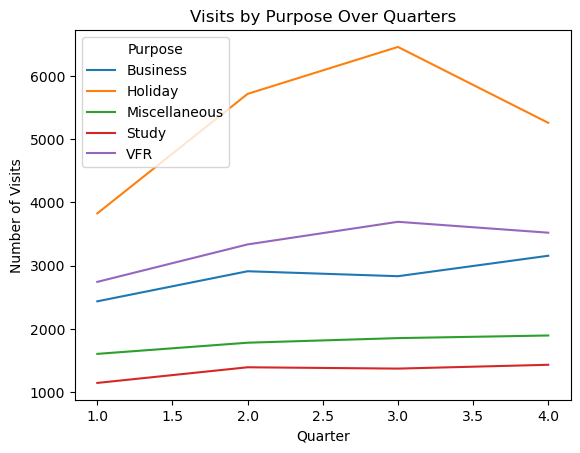

In [34]:
# Create a pivot table of visits by purpose over quarters
pivot_travelpac = travelpac[['quarter', 'purpose', 'visits']].pivot_table(index='quarter', columns='purpose', values='visits')
# Print data
print('Pivot Table of Visits by Purpose Over Quarters')
print(pivot_travelpac)

# Create a line plot for visits by purpose over quarters
pivot_travelpac.plot(kind='line')
# Add title and labels
plt.title('Visits by Purpose Over Quarters')
plt.xlabel('Quarter')
plt.ylabel('Number of Visits')
plt.legend(title='Purpose')
plt.show()

Summary of Visits by Purpose
purpose     Business      Holiday  Miscellaneous        Study          VFR
count       4.000000     4.000000       4.000000     4.000000     4.000000
mean     2833.402994  5315.525338    1782.568274  1334.030557  3322.822140
std       299.242858  1109.256668     128.494648   129.295729   413.568461
min      2434.949495  3826.367388    1603.321783  1143.762827  2742.451840
25%      2732.915519  4900.825295    1735.781729  1313.645321  3187.036017
50%      2871.462599  5487.949836    1816.375885  1380.816031  3427.943221
75%      2971.950075  5902.649879    1863.162430  1401.201267  3563.729344
max      3155.737283  6459.834294    1894.199543  1430.727338  3692.950279


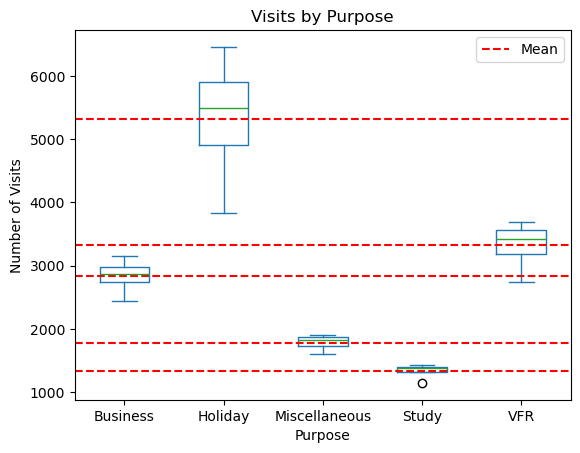

Skewness for Each Purpose: 
 purpose
Business        -0.729176
Holiday         -0.849617
Miscellaneous   -1.263637
Study           -1.772816
VFR             -1.291516
dtype: float64


In [35]:
# Summarize the visits by purpose
print("Summary of Visits by Purpose")
print(pivot_travelpac.describe())

# Create box plot of visits by purpose
pivot_travelpac.plot(kind="box")
plt.title("Visits by Purpose")
plt.xlabel("Purpose")
plt.ylabel("Number of Visits")
# Set horizontal lines for the mean visits for each purpose
mean_visits = pivot_travelpac.mean()
for purposetype, mean in enumerate(mean_visits):
    plt.axhline(mean, color='red', linestyle='--', label='Mean' if purposetype == 0 else "")
plt.legend()
plt.show()

# Calculate for skewness
skewness = pivot_travelpac.skew()
print("Skewness for Each Purpose: \n", skewness)
plt.show()

In [36]:
# Check for outliers
Q1 = pivot_travelpac['Study'].quantile(0.25)
Q3 = pivot_travelpac['Study'].quantile(0.75)
IQR = Q3 - Q1
outliers = (pivot_travelpac['Study'] < (Q1 - 1.5 * IQR)) | (pivot_travelpac['Study'] > (Q3 + 1.5 * IQR))
pivot_travelpac[outliers]

purpose,Business,Holiday,Miscellaneous,Study,VFR
quarter,,,,,
1,2434.949495,3826.367388,1603.321783,1143.762827,2742.45184


In [37]:
# Second form of analysis: Group data based on Uk or Overseas residents,
# Get the top ten countries based on number of times visited or average spending per visit

Top 10 Countries Visited by UK Residents:
country
Spain             1.715725e+07
France            8.555920e+06
Italy             4.694194e+06
Greece            3.933674e+06
Portugal          3.797351e+06
USA               3.601396e+06
Irish Republic    3.176709e+06
Turkey            3.035618e+06
Poland            2.668846e+06
Netherlands       2.537621e+06
Name: visits, dtype: float64


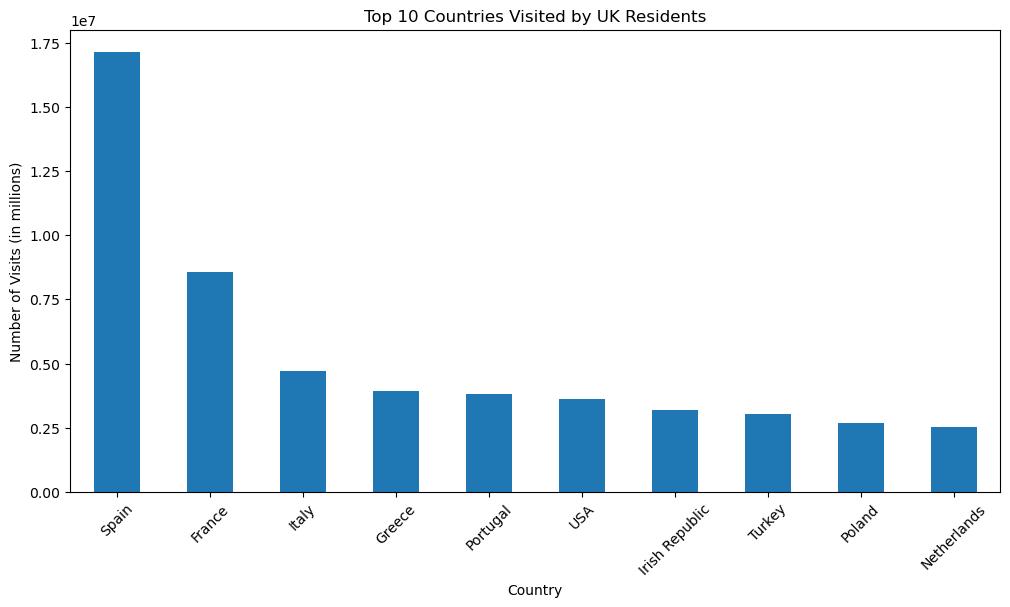

In [38]:
# Filter the data for only UK residents
uk_residents = travelpac[travelpac['ukos'] == 'UK residents']
# Group by country and add up visits for UK residents
country_visits = uk_residents.groupby('country')['visits'].sum()
# Sort the countries by the number of visits in descending order
top_10_countries = country_visits.sort_values(ascending=False).head(10)
# Print data
print("Top 10 Countries Visited by UK Residents:")
print(top_10_countries)

# Create bar graph of top 10 countries visited by Uk residents
plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar')
# Add title and labels
plt.title('Top 10 Countries Visited by UK Residents')
plt.xlabel('Country')
plt.ylabel('Number of Visits (in millions)')
plt.xticks(rotation=45)  # Rotate x labels to fit all countries
plt.show()

Top 10 Countries Based on Average Spending Per Visit by UK Residents
country
Australia                      2651.869409
Other Central & Sth.America    2382.459430
New Zealand                    2344.523099
Thailand                       2062.209644
Japan                          1910.540732
USA                            1845.829718
Other countries                1831.899689
Other Asia                     1784.857700
Mexico                         1765.876426
Barbados                       1754.894935
Name: spending_per_visit, dtype: float64


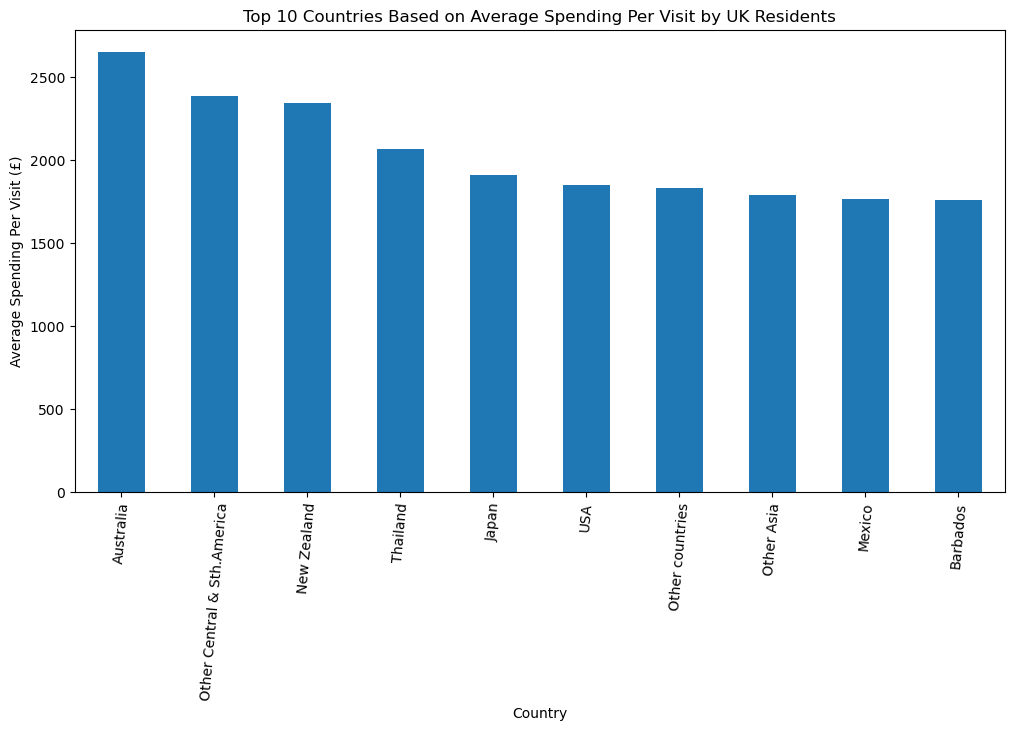

In [39]:
# Calculate for spending per visit
travelpac['spending_per_visit'] = travelpac['expend']/travelpac['visits']
# Group by country and calculate the average spending per visit for UK residents
uk_avg_spending_per_visit = travelpac[travelpac['ukos'] == 'UK residents'].groupby('country')['spending_per_visit'].mean()
# Print data
print('Top 10 Countries Based on Average Spending Per Visit by UK Residents')
print(uk_avg_spending_per_visit.sort_values(ascending=False).head(10))

# Create bar graph of top 10 countries based on average spending per visit by Uk residents
plt.figure(figsize=(12, 6))
uk_avg_spending_per_visit.sort_values(ascending=False).head(10).plot(kind='bar')
# Add title and labels
plt.title('Top 10 Countries Based on Average Spending Per Visit by UK Residents')
plt.xlabel('Country')
plt.ylabel('Average Spending Per Visit (£)')
plt.xticks(rotation=85)  # Rotate x labels to fit all countries
plt.show()

Top 10 Countries Visited by Overseas Residents:
country
USA               4889101.790
France            2950288.717
Germany           2833404.114
Irish Republic    2577870.427
Spain             2075809.120
Netherlands       1843664.799
Italy             1590304.080
Poland            1550390.944
Australia         1133959.551
Canada             963841.358
Name: visits, dtype: float64


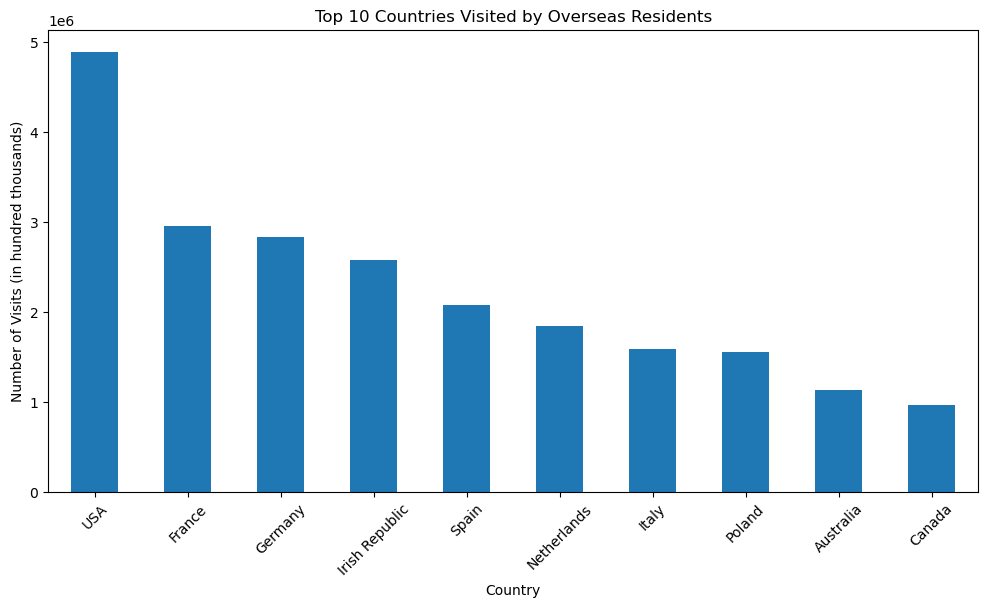

In [40]:
# Filter the data for only Overseas residents
overseas_residents = travelpac[travelpac['ukos'] == 'Overseas residents']
# Group by country and add up visits for Overseas residents
country_visits = overseas_residents.groupby('country')['visits'].sum()
# Sort the countries by the number of visits in descending order
top_10_countries = country_visits.sort_values(ascending=False).head(10)
# Print data
print("Top 10 Countries Visited by Overseas Residents:")
print(top_10_countries)

# Create bar graph of top 10 countries visited by Overseas residents
plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar')
# Add title and labels
plt.title('Top 10 Countries Visited by Overseas Residents')
plt.xlabel('Country')
plt.ylabel('Number of Visits (in hundred thousands)')
plt.xticks(rotation=45)  # Rotate x labels to fit all countries
plt.show()

Top 10 Countries Visited Based on Average Spending Per Visit by Overseas Residents
country
Other Middle East       2610.419577
China - Other           2100.722254
United Arab Emirates    1950.897679
Barbados                1869.999965
Other Africa            1699.588357
China - Hong Kong       1620.208480
Egypt                   1603.079086
Other Asia              1590.604373
Australia               1530.267500
Pakistan                1461.966790
Name: spending_per_visit, dtype: float64


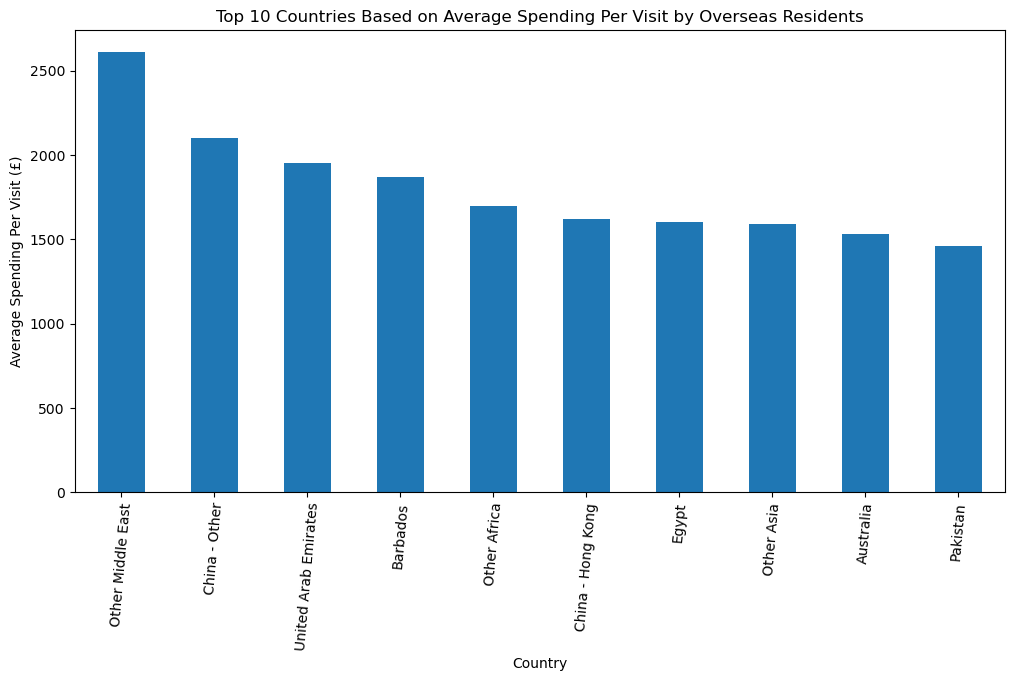

In [41]:
# Calculate for spending per visit
travelpac['spending_per_visit'] = travelpac['expend']/travelpac['visits']
# Group by country and calculate the average spending per visit for Overseas residents
overseas_avg_spending_per_visit = travelpac[travelpac['ukos'] == 'Overseas residents'].groupby('country')['spending_per_visit'].mean()
# Print data
print('Top 10 Countries Visited Based on Average Spending Per Visit by Overseas Residents')
print(overseas_avg_spending_per_visit.sort_values(ascending=False).head(10))

# Create bar graph of top 10 countries based on average spending per visit by Overseas residents
plt.figure(figsize=(12, 6))
overseas_avg_spending_per_visit.sort_values(ascending=False).head(10).plot(kind='bar')
# Add title and labels
plt.title('Top 10 Countries Based on Average Spending Per Visit by Overseas Residents')
plt.xlabel('Country')
plt.ylabel('Average Spending Per Visit (£)')
plt.xticks(rotation=85)  # Rotate x labels to fit all countries
plt.show()

In [42]:
# Third type of analysis: Segmenting demographics by age and sex

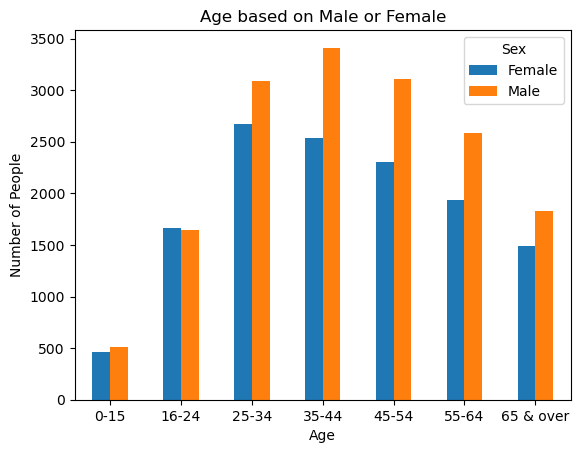

In [43]:
# Create bar graph for age based on male or female
travelpac.groupby(["Age", "Sex"]).size().unstack().plot(kind="bar", stacked=False)
# Add title and labels
plt.title("Age based on Male or Female")
plt.ylabel("Number of People")
plt.xlabel("Age")
plt.xticks(rotation=0)  # Rotate x labels to fit all ages
plt.show()

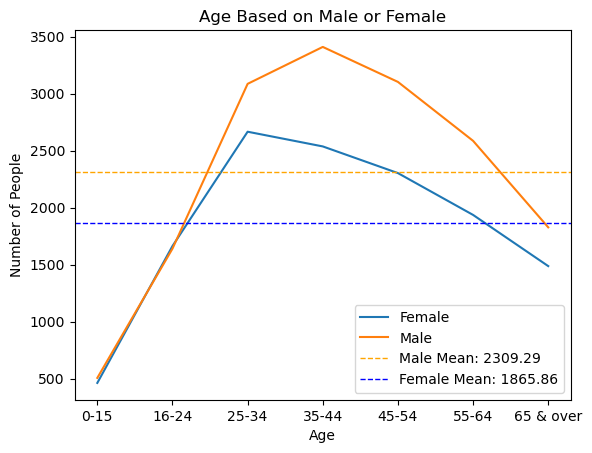

In [686]:
# Create a line plot for age based on male or female
travelpac.groupby(["Age", "Sex"]).size().unstack().plot(kind="line")
# Add title and labels
plt.title('Age Based on Male or Female')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.legend(title='Sex')
# Calculate means for each Sex
data = travelpac.groupby(["Age", "Sex"]).size().unstack()
male_mean = data['Male'].mean()
female_mean = data['Female'].mean()
# Add horizontal lines for the means
plt.axhline(y=male_mean, color='orange', linestyle='--', linewidth=1, label=f"Male Mean: {male_mean:.2f}")
plt.axhline(y=female_mean, color='blue', linestyle='--', linewidth=1, label=f"Female Mean: {female_mean:.2f}")
plt.legend()
plt.show()

# Introduction

Analyzing travel and tourism is important as this skill has an impact on the economic, social, and cultural aspects of society. Additionally, when compared with pre-coronavirus datasets, these datasets can provide useful information on how much travel has recovered since the pandemic. This dataset is called the 2023 travelpac, taken from the Office of National Statistics, and it consists of surveys conducted by the UK government. The dataset contains variables such as ukos, country, purpose, age, sex, visits, and expenditure which I will be using to analyze travel and tourism in the UK. Later, I will use ukos to separate groups by Uk or overseas residents. I will use country to order a list of top ten countries based on two subcategories. I will examine the different purposes of travels to see if there are any data trends. Age and sex will both be used to segment the demographics. Visits and expenditure will both be used to calculate the spending per visit.
with the data.

# Methodology

I began by loading the dataset from the csv file and saving it into a dataframe. The dataset needed to be cleaned for missing data, so I went through the dataset and declared the names of the values that were not available. After that, I checked for missing data in each column, removed any rows containing missing data using dropping, and saved the new dataframe into a new variable: travelpac. Then, I checked the number of values in each column of travelpac to make sure that they were all equal, meaning that all missing data was accounted for. Next, I converted the year and quarter to a PeriodIndex using the provided code. From then on, I began checking the proportions for each column using normalize to determine if it could be changed to categorical data. I made the changes to the appropriate columns in order to make storing data more efficient. Finally, I checked that the data type for each column was correct before beginning my analysis. 
Now that I finished cleaning the data and making transformations, I looked towards my first form of analysis in which I analyzed the trends in the purpose of travel using a pivot table, line plot, and box plot. For the pivot table, I made quarter as the index, purpose as the column, and the number of visits as the value. This way, the visits are ordered based on quarter. I made the line plot using the data from the pivot table so that the line plot would also change based on the quarter. I summarized the visits by purpose from the pivot table data, and then I created a box plot. I included the mean number of visits and applied a for loop to perform this calculation for all travel purposes. I then created the calculation for skewness and applied it to all travel purposes. Lastly, I performed the calculation for finding outliers.

My second form of analysis focuses on grouping the data based on UK or overseas residents. Then I gather the top ten countries based on the number of times visited or the average spending per visit. The first two bar graphs are filtered to only represent UK residents, while the last two bar graphs are filtered to only represent overseas residents. Gathering the top ten most visited countries was done by grouping by country, adding up the number of visits, and sorting the countries by the number of visits in descending order. Gathering the top ten countries based on average spending per visit was done by grouping by country, creating a column for spending per visit calculated from expend and visits, and sorting the average spending per visit in descending order.

My third form of analysis involved segmenting the demographics by age and sex. I grouped the data by age and sex, setting age as the index, sex as the column, and the number of people as the value. I use a line plot with the same groups to complement this bar graph. I also get the mean number of males and females and set horizontal lines on my graph to indicate this.

# Results

I chose to incorporate a pivot table for my first form of analysis because they are useful for transforming data into a wide format. I chose to use a line plot as I could create multiple lines for each purpose of travel. I wanted to compliment my line plot with a box plot as it would better visualize the distribution of each travel purpose. I performed the calculation for skewness since that is one thing that box plots specialize in finding. The boxplot of visits for each purpose were all negatively skewed, meaning that there were fewer lower number of visits, with a higher concentration of large numbers of visits. This is also backed up by my graph, as distributions that are skewed left, or negatively skewed, tend to have a smaller mean than median. The box plot also showed a dot, representing an outlier, under “Study” as the purpose of travel, so I performed the calculation for finding outliers. This outlier was on the lower end, and a likely explanation for this is that this was around the time of year when most students are on break. This reasoning could definitely result in a lower number of travels f    or study.
For my second form of analysis, I paired the data with the corresponding bar graph to better visualize the information. The bar graphs from my second form of analysis showed that Spain, France, Italy, Greece, Portugal, USA, Irish Republic, Turkey, Poland, and the Netherlands were the top ten countries visited by UK residents. The second bar graph shows that Australia, other Central & South America, New Zealand, Thailand, Japan, USA, other countries, other Asia, Mexico, and Barbados are the top ten countries based on average spending per visit by UK residents. The third bar graph shows that USA, France, Germany, Irish Republic, Spain, Netherlands, Italy, Poland, Australia, and Canada are the top ten countries by overseas residents. The fourth bar graph shows that other Middle East, China - other, United Arab Emirates, Barbados, other Africa, China - Hong Kong, Egypt, other Asia, Australia, and Pakistan are the top ten countries based on average spending per visit by overseas     residents.

In my third form of analysis, I made sure to unstack the data so that the male and female bars would sit side by side. With this visualization, we can quickly see which sex is more dominant based on age group. The distribution of data seems normal since it is in the shape of a downward opening parabola. I say this because the area in which the number of males and females exceeds the mean number of males and females is within the central age groups. This makes sense since there are fewer people traveling in the 0-24 and 55 & over age groups since younger people tend to be less independent and older people tend to be ss active.

# Conclusions

After examining the different purposes of travels to see if there are any data trends, I found that analyzing travel and tourism is important as this skill has an impact on the economic, social, and cultural aspects of society. These datasets also help with comparisons with pre-coronavirus datasets, these datasets can provide useful information on how much travel has recovered since the pandemic. with the data.

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [77]:
!playwright install 